# Deep Learning and Machine Learning Pipeline Explanation

## Introduction
In this script, I combine traditional machine learning techniques with deep learning using PyTorch to address a binary classification problem. This involves data preprocessing, model training with Logistic Regression and Neural Networks, and evaluation using various metrics.

## Libraries and Data Preparation
Firstly, I import necessary libraries:

- `numpy` and `pandas` for data handling.
- `sklearn` for machine learning functions.
- `torch` and `torch.nn` for building neural network models.
- `matplotlib` and `seaborn` for visualization.

I load the dataset from 'Dataset.csv' and encode the categorical labels using `LabelEncoder`. Then, I separate the features (`X`) and the labels (`y`).

## Data Splitting
Using `StratifiedShuffleSplit`, I split the data into training and test sets with a 50-50 split while preserving the percentage of samples for each class. I also print the number of observations in the training set and their distribution across classes.

## Feature Scaling
I standardize the features using `StandardScaler` to ensure they're on the same scale, which is crucial for models like Logistic Regression and Neural Networks.

## Logistic Regression Model
I train a Logistic Regression model with L1 regularization, timing the training and prediction phases. I evaluate its performance using precision, recall, F1-score, and display the training and test times in milliseconds.

## ROC Curve for Logistic Regression
I plot the Receiver Operating Characteristic (ROC) curve and calculate the area under the curve (AUC) for the Logistic Regression model, providing a visualization of its performance.

## Neural Network Model 1
I define `NN_model1`, a simple neural network with a single linear layer and a LogSigmoid activation function. The model's input and output sizes are determined by the dataset.

### Training Neural Network Model 1
Using Stochastic Gradient Descent (SGD) and CrossEntropyLoss, I train `NN_model1` for 8000 iterations and plot the training loss. I evaluate its performance on the test set, again using precision, recall, F1-score, and test time.

### ROC Curve for Neural Network Model 1
Similar to the Logistic Regression model, I plot the ROC curve for `NN_model1` and calculate the AUC.

## Neural Network Model 2
I define `NN_model2`, a more complex neural network with two hidden layers. This model uses LogSigmoid activation functions in each layer.

### Training Neural Network Model 2
I train `NN_model2` using the same procedure as `NN_model1`, plotting the loss curve and evaluating its performance on the test set using the same metrics.

### ROC Curve for Neural Network Model 2
Finally, I plot the ROC curve for `NN_model2` and calculate the AUC.

## Summary
This script demonstrates a comprehensive approach to a binary classification problem, utilizing both traditional machine learning and deep learning techniques. It emphasizes the importance of feature scaling, model evaluation, and provides insights into the performance of different models using various metrics and ROC curves.


In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import recall_score, make_scorer, mean_squared_error, confusion_matrix, precision_score, roc_curve, auc, accuracy_score, f1_score, roc_auc_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import torch
import torch.nn as nn
import time
from sklearn.model_selection import StratifiedShuffleSplit

# Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:

df = pd.read_csv('Dataset.csv')


le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
X = df.drop('Label', axis=1)
y = df['Label']


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#  How many observations do you have in  training set?
print(f'Training set has {X_train.shape[0]} observations.')

#  How many observations for each class in  training set?
print(y_train.value_counts())

# Z-standarize the input features of the training and test sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Training set has 155 observations.
0    105
1     50
Name: Label, dtype: int64


Precision: 0.90
Recall: 0.91
F1-score: 0.91
Training time: 17.61 ms
Test time: 7.01 ms


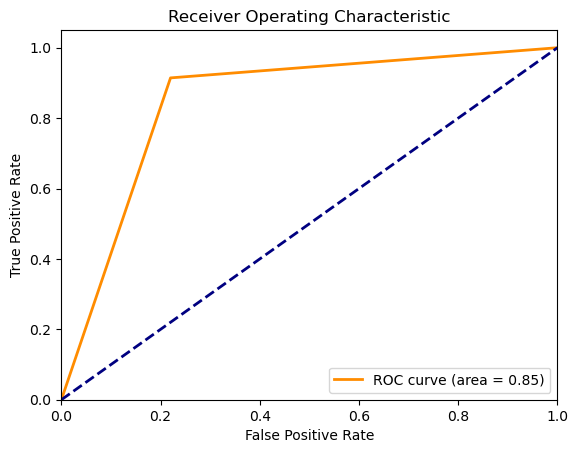

In [3]:

start_train = time.time()
clf = LogisticRegression(penalty='l1', solver='saga', random_state=42)
clf.fit(X_train_scaled, y_train)
end_train = time.time()

start_test = time.time()
y_pred = clf.predict(X_test_scaled)
end_test = time.time()

print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1-score: {f1_score(y_test, y_pred):.2f}')


print(f'Training time: {(end_train - start_train) * 1000:.2f} ms')
print(f'Test time: {(end_test - start_test) * 1000:.2f} ms')

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

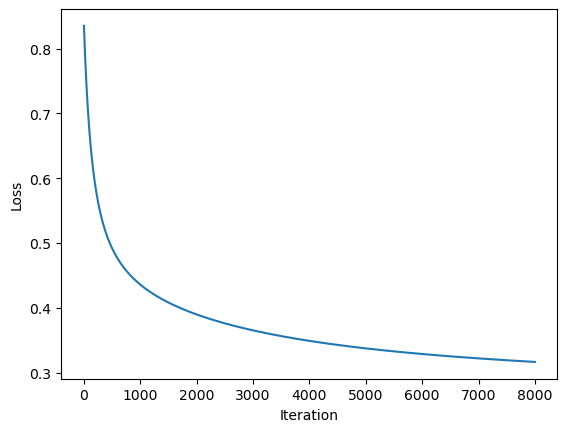

In [4]:


class NN_model1(nn.Module):
    def __init__(self, input_size, output_size):
        super(NN_model1, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.logsigmoid = nn.LogSigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.logsigmoid(out)
        return out


input_size = X_train_scaled.shape[1]
output_size = 2
model = NN_model1(input_size, output_size)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)


losses = []
for i in range(8000):
    
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

# Plot the loss versus iterations
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

Precision: 0.85
Recall: 0.90
F1-score: 0.88
Test time: 1.07 ms


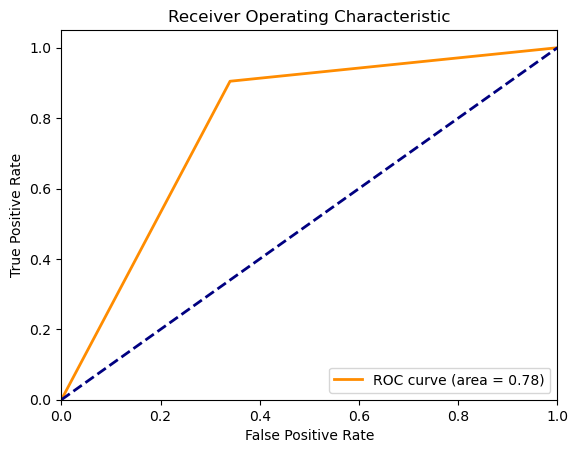

In [5]:



X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float)

start_test = time.time()
outputs_test = model(X_test_tensor)
_, predicted = torch.max(outputs_test.data, 1)
end_test = time.time()

y_pred = predicted.numpy()
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1-score: {f1_score(y_test, y_pred):.2f}')


print(f'Test time: {(end_test - start_test) * 1000:.2f} ms')


fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

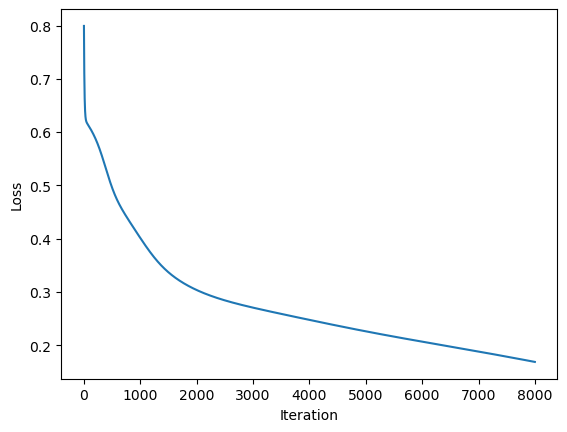

In [6]:
class NN_model2(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NN_model2, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, output_size)
        self.logsigmoid = nn.LogSigmoid()

    def forward(self, x):
        out = self.logsigmoid(self.layer1(x))
        out = self.logsigmoid(self.layer2(out))
        out = self.logsigmoid(self.layer3(out))
        return out


hidden_size1 = 100
hidden_size2 = 60
model2 = NN_model2(input_size, hidden_size1, hidden_size2, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.01)


losses = []
for i in range(8000):
    
    outputs = model2(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    losses.append(loss.item())


plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

Precision: 0.82
Recall: 0.84
F1-score: 0.83
Test time: 1.07 ms


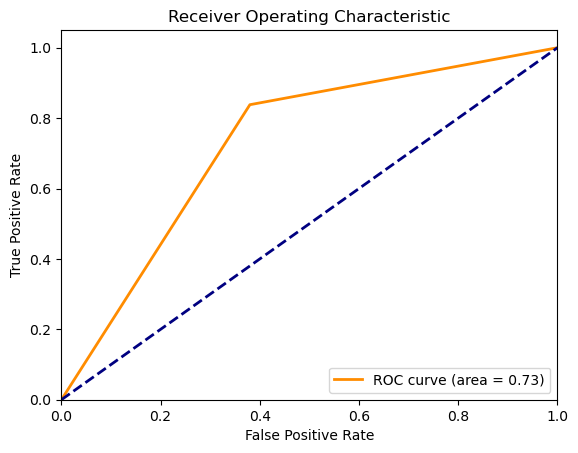

In [14]:

start_test = time.time()
outputs_test = model2(X_test_tensor)
_, predicted = torch.max(outputs_test.data, 1)
end_test = time.time()

y_pred = predicted.numpy()
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1-score: {f1_score(y_test, y_pred):.2f}')

print(f'Test time: {(end_test - start_test) * 1000:.2f} ms')


fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()